In [ ]:
#@title ## Big Data Lab  - Assignment 5  - Logistic Regression
#@markdown ### Instructions
#@markdown 1. The purpose of this assignment is to cover the built and use of a Logistic regression model.  
#@markdown  
#@markdown 2. You can choose to complete the assignment on your own or to colaborate with a partner. You are welcome to discuss your work with your fellow students but to maintain a healthy learning process - please keep all final answers to yourself! 
#@markdown 3. Complete the answers in the empty cells - Feel free to add as many extra cell as you require.
#@markdown 4. Fill in your name and select the Year and Department.
#@markdown 5. When done - Download the colab notebook by going to 'File -> Download .ipynb' and submit the file in the course's moodle page before the due date. 
 
#@markdown ---
#@markdown ### Enter your information:
Student1_Full_Name = "" #@param {type:"string"}
Student2_Full_Name = "" #@param {type:"string"}
Depatment = "Computer Science" #@param ["Select","Computer Science", "Industrial Engineering", "Economics and Management"]
Year = "Second" #@param ["Select","Second", "Third", "Fourth"]

#@markdown ---


## <font color=RoyalBlue>Introduction<font>

World Health Organization has  estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.



1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import plotly.graph_objects as go
import pandas.testing

## <font color=RoyalBlue>Data Preparation<font>

### <font color=CornflowerBlue>Source:<font>

The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.  The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

2. Create a dataframe from the following link. Name it "heart_df".
>'https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/heart_d.csv'

In [ ]:
heart_df=pd.read_csv("https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/heart_d.csv")
heart_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


><h3>DataSet Information:</h3>						
	Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

 - **<font color=SteelBlue>Demographic:<font>**
sex: male or female;(Nominal)

    -  age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


 - **<font color=SteelBlue>Behavioural<font>**

    -  currentSmoker: whether or not the patient is a current smoker (Nominal)

    -  cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

 - **<font color=SteelBlue>Medical( history):<font>**

    -  BPMeds: whether or not the patient was on blood pressure medication (Nominal)

    -  prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

    -  prevalentHyp: whether or not the patient was hypertensive (Nominal)

    -  diabetes: whether or not the patient had diabetes (Nominal)

 - **<font color=SteelBlue>Medical(current):<font>** 

    -  totChol: total cholesterol level (Continuous)

    -  sysBP: systolic blood pressure (Continuous)

    -  diaBP: diastolic blood pressure (Continuous)

    -  BMI: Body Mass Index (Continuous)

    -  heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

    -  glucose: glucose level (Continuous)


 - **<font color=SteelBlue>Predict variable (desired target):<font>**

    -  10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


3. Print the head and info of the dataframe

In [ ]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


4. What is the dataframe's shape?

In [ ]:
heart_df.shape

(4240, 16)

##Data preparation

5. Show the number of rows with missing data.






In [ ]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
count=0
count=heart_df.isnull().any(axis=1).sum()
print('Total number of rows with missing values is ', count)
p=(count/heart_df.shape[0])*100
print('since it is only',round(p), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


In [ ]:
heart_df.dropna(axis=0,inplace=True)

## <font color=RoyalBlue>Exploratory Analysis<font>


6. Plot a histogram for each feature ( I used matplot lib for this plot but you can choose plotly or seaborn as well)

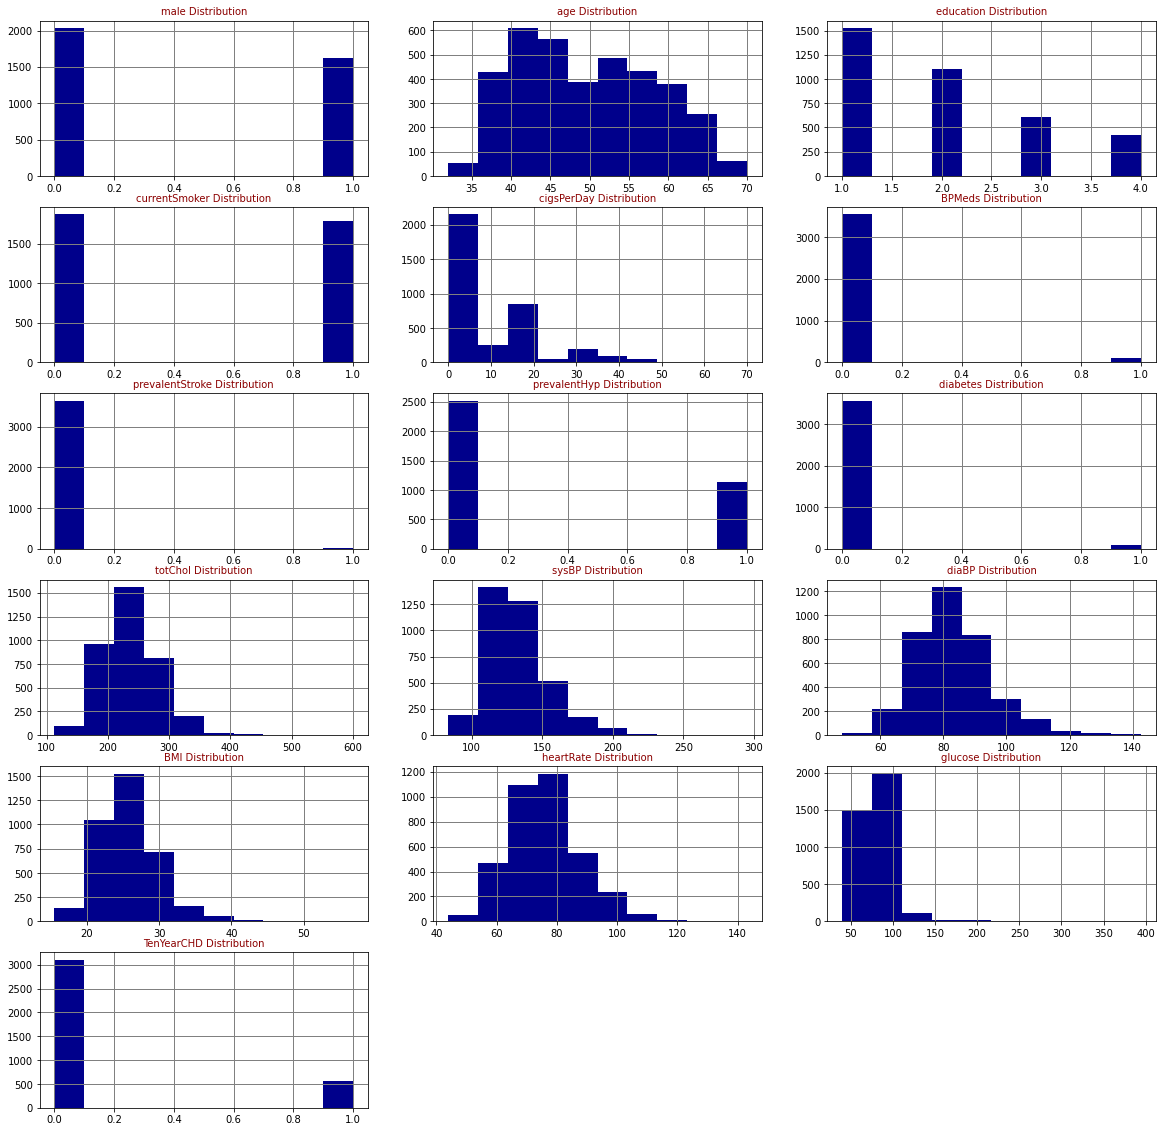

In [ ]:
fig = plt.figure(figsize=(20,20))
index = 0
for (columnName, columnData) in heart_df.iteritems():
    index += 1
    ax = fig.add_subplot(6,3, index)
    ax.hist(columnData.values,histtype='bar', color='darkblue')
    ax.grid(color='gray', linewidth=1)
    ax.set_title(columnName + ' Distribution', color='darkred', size=10)

7a. Plot the dependent variable histogram by itself.Include the precentage at the top of each bar.

In [ ]:
TenYearCHD = heart_df.TenYearCHD.value_counts()
percentage = [str(round(sur/TenYearCHD.sum(),2)*100)+'%' for sur in TenYearCHD ]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['No', 'Yes'],
    y=TenYearCHD,
    marker_color=['lightsalmon','green'],
    text=percentage,
    textposition='outside',
))
fig.update_layout(
    title='Risk in 10 years', 
    yaxis_title='Number of cases',
    )
fig.show()

Inference - only 15% of cases do have 10 year risk of coronary heart disease.

7b. Plot the 10 year risk of disease over the age distribution. Hint: in plotly, use the barmode='stack' option. 

In [ ]:
ages = heart_df.pivot_table(values='TenYearCHD' , index='age')
ages['no'] = 1-ages.TenYearCHD
ages.columns=['yes','no']
ages.head()

,yes,no
age,,
32,0.000000,1.000000
33,0.000000,1.000000
34,0.000000,1.000000
35,0.060606,0.939394
36,0.025974,0.974026


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=ages.index, y=ages.no, name='No'))
fig.add_trace(go.Bar(x=ages.index, y=ages.yes, name='Yes'))
fig.update_layout(
    title_text='Distribution of ages', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates,
    barmode='stack'
)

fig.show()

7c. Display statistical analysis

In [ ]:
heart_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


8. Use the plotly library to pairplot the entire DF but exclude the target variable.


In [ ]:
dimensions = [dict(label=x, values=heart_df[x]) for x in heart_df.columns if x != 'TenYearCHD']
fig = go.Figure()
fig.add_trace(go.Splom(dimensions=dimensions))
fig.update_traces(
    marker=dict(color=heart_df['TenYearCHD'],
                size=5,
                colorscale='Bluered',
                line=dict(width=0.5,
                color='rgb(230,230,230)')),
    text=['non-diabetic' if TenYearCHD==0 else 'diabetic' for TenYearCHD in heart_df['TenYearCHD']],
    diagonal=dict(visible=True)
)
fig.update_layout(
    font=dict(
        family="monospace",
        size=8,
        color="RebeccaPurple"
    ),

    height=900
)
fig.show()

9. Show a correlation matrix and heatmap of the data frame

In [ ]:
#pd.set_option("display.precision", 3)
#??????
#corr_df
corr_df = heart_df.corr()
corr_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


In [ ]:
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap"
})

10. Find features that highly correlate(+/- 0.85) to each other - keep one feature and drop the rest. 

In [ ]:
for i in range(len(corr_df.columns)-1):
  print(corr_df.columns[i], 'is correlated to: ')
  for j in range(len(corr_df.columns)-1):
    if abs(corr_df.iloc[i,j])>=0.85 and i is not j:
      print(corr_df.columns[j], end=', ')
  print('\n----------------------')

male is correlated to: 

----------------------
age is correlated to: 

----------------------
education is correlated to: 

----------------------
currentSmoker is correlated to: 

----------------------
cigsPerDay is correlated to: 

----------------------
BPMeds is correlated to: 

----------------------
prevalentStroke is correlated to: 

----------------------
prevalentHyp is correlated to: 

----------------------
diabetes is correlated to: 

----------------------
totChol is correlated to: 

----------------------
sysBP is correlated to: 

----------------------
diaBP is correlated to: 

----------------------
BMI is correlated to: 

----------------------
heartRate is correlated to: 

----------------------
glucose is correlated to: 

----------------------


In [ ]:
X = heart_df.drop('TenYearCHD',axis=1)
y = heart_df.TenYearCHD

11. Run the Univariate Selection Statistical Test using chi2.
Create a X_chi dataframe by slicing the X dataframe to contain the top 6 features of the test result.  

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.to_list()
print("The top 6 top scored features are ",chi_feature)

The top 6 top scored features are  ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'glucose']


In [ ]:
scores = pd.Series(chi_selector.scores_.tolist()) 
p_values = pd.Series(chi_selector.pvalues_.tolist()) 
selected_df = pd.DataFrame({'univariate_score':scores, 'p_values':p_values})
selected_df.set_index(X.columns, inplace=True, drop=True)
univariate = selected_df.sort_values(by='univariate_score', ascending=False)
univariate

,univariate_score,p_values
sysBP,669.136021,1.539910e-147
glucose,379.914235,1.299073e-84
age,296.200344,2.216184e-66
totChol,250.490205,2.030350e-56
cigsPerDay,155.798307,9.370050e-36
diaBP,142.521814,7.477994e-33
prevalentHyp,82.845455,8.872601e-20
diabetes,31.067621,2.491938e-08
BPMeds,28.191569,1.098822e-07
male,17.107751,3.531788e-05


In [ ]:
X_chi = X[chi_feature]
X_chi

,age,cigsPerDay,totChol,sysBP,diaBP,glucose
0,39,0.0,195.0,106.0,70.0,77.0
1,46,0.0,250.0,121.0,81.0,76.0
2,48,20.0,245.0,127.5,80.0,70.0
3,61,30.0,225.0,150.0,95.0,103.0
4,46,23.0,285.0,130.0,84.0,85.0
...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,86.0
4234,51,43.0,207.0,126.5,80.0,68.0
4237,52,0.0,269.0,133.5,83.0,107.0
4238,40,0.0,185.0,141.0,98.0,72.0


12. Run the Feature importance Statistical Test using XGBClassifier. Create a X_xgb dataframe by slicing the X dataframe to contain the top 6 features of the test result.

In [ ]:
from xgboost import XGBClassifier


In [ ]:
model = XGBClassifier()
model.fit(X,y)
feat_importances_df = pd.DataFrame({'feature_importance':model.feature_importances_}, index=X.columns)
feat_importances_df=feat_importances_df.sort_values(by='feature_importance', ascending=False)
feat_importances_df

,feature_importance
age,0.211789
prevalentHyp,0.134575
male,0.113777
sysBP,0.097731
glucose,0.069663
cigsPerDay,0.061386
diaBP,0.060623
education,0.056143
BPMeds,0.051929
totChol,0.044180


In [ ]:
X_xgb = X[feat_importances_df.index[:6]]
X_xgb        

,age,prevalentHyp,male,sysBP,glucose,cigsPerDay
0,39,0,1,106.0,77.0,0.0
1,46,0,0,121.0,76.0,0.0
2,48,0,1,127.5,70.0,20.0
3,61,1,0,150.0,103.0,30.0
4,46,0,0,130.0,85.0,23.0
...,...,...,...,...,...,...
4233,50,1,1,179.0,86.0,1.0
4234,51,0,1,126.5,68.0,43.0
4237,52,0,0,133.5,107.0,0.0
4238,40,1,1,141.0,72.0,0.0


13. Split the X_chi and y to train and test sets



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=heart_df.columns[0:-1])
scaled_X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.119755,-1.232580,1.975209,-0.978364,-0.757169,-0.176901,-0.075987,-0.672860,-0.166784,-0.949108,-1.194111,-1.078881,0.292050,0.356370,-0.203044
1,-0.893053,-0.414905,0.019249,-0.978364,-0.757169,-0.176901,-0.075987,-0.672860,-0.166784,0.298294,-0.514881,-0.160118,0.725010,1.608469,-0.244883
2,1.119755,-0.181283,-0.958730,1.022114,0.920689,-0.176901,-0.075987,-0.672860,-0.166784,0.184894,-0.220548,-0.243642,-0.108929,-0.060996,-0.495920
3,-0.893053,1.337256,0.997229,1.022114,1.759618,-0.176901,-0.075987,1.486194,-0.166784,-0.268707,0.798296,1.009217,0.688110,-0.895729,0.884782
4,-0.893053,-0.414905,0.997229,1.022114,1.172368,-0.176901,-0.075987,-0.672860,-0.166784,1.092095,-0.107344,0.090454,-0.659969,0.773736,0.131672


In [ ]:
from sklearn.model_selection import train_test_split
X_chi_train, X_chi_test, y_chi_train, y_chi_test = train_test_split(X_chi, y, test_size=0.3, random_state=1234)
train_chi_df = pd.merge(left=X_chi_train, right=y_chi_train, left_index=True, right_index=True)
test_chi_df = pd.merge(left=X_chi_test, right=y_chi_test, left_index=True, right_index=True)
train_chi_df.head(10)

,age,cigsPerDay,totChol,sysBP,diaBP,glucose,TenYearCHD
3304,47,11.0,229.0,127.0,76.5,64.0,0
104,42,20.0,173.0,100.0,63.0,99.0,0
3409,58,0.0,241.0,153.0,106.0,84.0,0
1078,56,0.0,273.0,125.0,83.0,66.0,0
2100,50,0.0,305.0,114.0,80.0,80.0,0
1349,64,30.0,185.0,114.0,73.0,97.0,0
23,52,20.0,215.0,132.0,82.0,75.0,0
3923,59,0.0,248.0,151.5,71.0,110.0,0
4200,38,0.0,169.0,115.0,60.0,60.0,0
3822,38,0.0,185.0,100.0,72.0,83.0,0


14. Split the X_xgb and y to train and test sets

In [ ]:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y, test_size=0.3, random_state=1234)
train_xgb_df = pd.merge(left=X_xgb_train, right=y_xgb_train, left_index=True, right_index=True)
test_xgb_df = pd.merge(left=X_xgb_train, right=y_xgb_train, left_index=True, right_index=True)
test_xgb_df.head(10)

,age,prevalentHyp,male,sysBP,glucose,cigsPerDay,TenYearCHD
3304,47,0,0,127.0,64.0,11.0,0
104,42,0,0,100.0,99.0,20.0,0
3409,58,1,0,153.0,84.0,0.0,0
1078,56,1,0,125.0,66.0,0.0,0
2100,50,0,0,114.0,80.0,0.0,0
1349,64,0,1,114.0,97.0,30.0,0
23,52,0,0,132.0,75.0,20.0,0
3923,59,1,1,151.5,110.0,0.0,0
4200,38,0,0,115.0,60.0,0.0,0
3822,38,0,0,100.0,83.0,0.0,0


15a. Standard scale the X_chi train and test subsets


In [ ]:
x_chi_train_scaler = StandardScaler()
x_chi_test_scaler = StandardScaler()
X_chi_train_scaled =pd.DataFrame(x_chi_train_scaler.fit_transform(X_chi), columns=X_chi.columns[:])
X_chi_test_scaled = pd.DataFrame(x_chi_test_scaler.fit_transform(X_chi), columns=X_chi.columns[:])

15b. Standard scale the X_xgb train and test subsets


In [ ]:
x_xgb_train_scaler = StandardScaler()
x_xgb_test_scaler = StandardScaler()
X_xgb_train_scaled = pd.DataFrame(x_xgb_train_scaler.fit_transform(X_xgb), columns=X_xgb.columns[:])
X_xgb_test_scaled = pd.DataFrame(x_xgb_test_scaler.fit_transform(X_xgb), columns=X_xgb.columns[:])

16a. Create a logistic model of the X_chi dataset.
train , test it and display a dataframe with the probzbilities and prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel_chi = LogisticRegression()
logmodel_chi.fit(X_chi_train,y_chi_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
probability_chi = logmodel_chi.predict_proba(X_chi_test)
prediction_chi = logmodel_chi.predict(X_chi_test)

In [ ]:
y_chi_test_prob_0 = pd.Series(probability_chi[:,0], name='probability_0', index=y_chi_test.index)
y_chi_test_prob_1 = pd.Series(probability_chi[:,1], name='probability_1', index=y_chi_test.index)
y_chi_test_pred = pd.Series(prediction_chi, name='prediction', index=y_chi_test.index)

test_chi_results = pd.DataFrame(data={'probability_chi_0':y_chi_test_prob_0, 'probability_chi_1':y_chi_test_prob_1,'prediction_chi':y_chi_test_pred, 'actual_chi':y_chi_test})
test_chi_results

,probability_chi_0,probability_chi_1,prediction_chi,actual_chi
443,0.800766,0.199234,0,0
2176,0.910847,0.089153,0,0
2389,0.881117,0.118883,0,0
2184,0.864581,0.135419,0,0
4059,0.752994,0.247006,0,0
...,...,...,...,...
954,0.794870,0.205130,0,0
3565,0.871319,0.128681,0,0
1222,0.974009,0.025991,0,0
926,0.552992,0.447008,0,0


16a. Create a logistic model of the X_xgb dataset.
train , test it and display a dataframe with the probzbilities and prediction

In [ ]:
logmodel_xgb = LogisticRegression()
logmodel_xgb.fit(X_xgb_train,y_xgb_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
probability_xgb = logmodel_chi.predict_proba(X_xgb_test)
prediction_xgb = logmodel_chi.predict(X_xgb_test)

In [ ]:
y_xgb_test_prob_0 = pd.Series(probability_xgb[:,0], name='probability_0', index=y_xgb_test.index)
y_xgb_test_prob_1 = pd.Series(probability_xgb[:,1], name='probability_1', index=y_xgb_test.index)
y_xgb_test_pred = pd.Series(prediction_xgb, name='prediction', index=y_xgb_test.index)

test_xgb_results = pd.DataFrame(data={'probability_xgb_0':y_xgb_test_prob_0, 'probability_xgb_1':y_xgb_test_prob_1,'prediction_xgb':y_xgb_test_pred, 'actual_xgb':y_xgb_test})
test_xgb_results

,probability_xgb_0,probability_xgb_1,prediction_xgb,actual_xgb
443,0.957788,0.042212,0,0
2176,0.972467,0.027533,0,0
2389,0.966220,0.033780,0,0
2184,0.964059,0.035941,0,0
4059,0.919100,0.080900,0,0
...,...,...,...,...
954,0.937312,0.062688,0,0
3565,0.962926,0.037074,0,0
1222,0.991519,0.008481,0,0
926,0.900692,0.099308,0,0


17. What is the accuracy of both models?

In [ ]:
correct_chi_rows = test_chi_results.loc[test_chi_results.prediction_chi == test_chi_results.actual_chi].any(axis=1).count()
accuracy_chi = round(correct_chi_rows/len(test_chi_results),3)
accuracy_chi

0.866

In [ ]:
correct_xgb_rows = test_xgb_results.loc[test_xgb_results.prediction_xgb == test_xgb_results.actual_xgb].any(axis=1).count()
accuracy_xgb = round(correct_xgb_rows/len(test_xgb_results),3)
accuracy_xgb

0.862

18. Plot the confusion matrix of the more accurate model

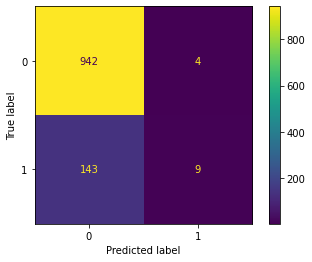

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logmodel_chi, X_chi_test, y_chi_test, values_format='0.0f')

19. show the accuracy, precision, recall and F1 scores

In [ ]:
from sklearn import metrics
y_test_pred = test_chi_results.prediction_chi
print("accuarcy",metrics.accuracy_score(y_chi_test, y_test_pred))

accuarcy 0.8661202185792349


In [ ]:
print("precision",metrics.precision_score(y_chi_test, y_test_pred))

precision 0.6923076923076923


In [ ]:
print("Recall",metrics.recall_score(y_chi_test, y_test_pred))

Recall 0.05921052631578947


In [ ]:
print("F1",metrics.f1_score(y_chi_test, y_test_pred))

F1 0.10909090909090909


20. Try adjusting the probability threshold to 0.2 in order to improve the recall

a. plot the current 1 prediction probability of the test set

b. move the threshold to and show before and after classification report

In [ ]:
y_pred_prob = test_chi_results.probability_chi_1

fig = go.Figure()
trace = go.Histogram(
    x = y_pred_prob,
)
fig.add_trace(trace)

In [ ]:
from sklearn.preprocessing import binarize
y_pred_02 = binarize(X=[y_pred_prob], threshold=0.2)[0]
y_pred_02 = pd.Series(y_pred_02)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_chi_test,y_test_pred))
print('-----------------------------------------------------------------------')
print(classification_report(y_chi_test,y_pred_02))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       946
           1       0.69      0.06      0.11       152

    accuracy                           0.87      1098
   macro avg       0.78      0.53      0.52      1098
weighted avg       0.84      0.87      0.81      1098

-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       946
           1       0.25      0.48      0.33       152

    accuracy                           0.73      1098
   macro avg       0.58      0.63      0.58      1098
weighted avg       0.81      0.73      0.76      1098



21. Calculate the AUC and draw its graph using the origonal predictions



In [ ]:
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_chi_test, y_pred_prob)

In [ ]:
fig=go.Figure()
trace=go.Scatter(x=fp_rate, y=tp_rate, mode='lines', hoverinfo='x+y+text', text=thresholds)
fig.add_trace(trace)
fig.update_layout(
    title="ROC curve for diabetes classifier",
    xaxis_title="False Positive Rate (1 - Specificity)",
    yaxis_title="True Positive Rate (Sensitivity/Recall)",
    
)
fig.show()

In [ ]:
AUC = metrics.roc_auc_score(y_chi_test, y_pred_prob)
print('AUC',AUC)

AUC 0.7151858239679537


22. Use Cross validation and average the AUC and Accuracy scores

In [ ]:
from sklearn.model_selection import cross_val_score
auc_scores =cross_val_score(logmodel_chi, X_chi_test_scaled, y, cv=10, scoring='roc_auc')
auc_scores

array([0.71628179, 0.73732719, 0.68179724, 0.73006912, 0.70541475,
       0.72603687, 0.75927419, 0.73490783, 0.72609971, 0.72281525])

In [ ]:
accuracy_scores = cross_val_score(logmodel_chi, X_chi_test_scaled, y, cv=10, scoring='accuracy')
accuracy_scores

array([0.84972678, 0.85245902, 0.84972678, 0.8579235 , 0.8442623 ,
       0.84153005, 0.86885246, 0.84972678, 0.85479452, 0.84931507])

In [ ]:
print('Mean values')
print('auc:', auc_scores.mean())
print('accuracy: ', accuracy_scores.mean())

Mean values
auc: 0.7240023933902422
accuracy:  0.8518317239314321


22. Conclusions:
* How well does the model perform in predicting 0?
* How well does the model perform in predicting 1?

The model predicting 0 is performing good: the difference between the test and prediction values are small. For example Precision in test is 0.87 and in prediction 0.90

The model predicting 1 is performing bad: the difference between the test and prediction values are huge. For example Precision in test is 0.69 and in prediction 0.25.